# Centralized Training 

In the Centralized Training multi-agent paradigm, training of the agents is performed by a central controller. \
The model of our environment is fully known and relatively simplistic. Therefore, the optimal joint action(s) $a = (a_i,a_j)$ can be solved exactly at low computational cost.

In [1]:
from env.lever_game import LeverGame
import numpy as np
import itertools

env = LeverGame()

q_values = np.zeros((env.n_levers,env.n_levers))
for k,l in itertools.product(range(env.n_levers), repeat=2):
    _, r, _, _ = env.step((k,l))
    
    # Q values are just equal to reward obtained
    q_values[k][l] = r

and so the Q-table looks as follows

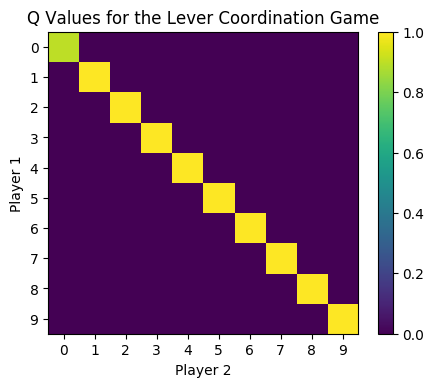

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=100, figsize=[5,4])

image = ax.imshow(q_values, vmin=0, vmax=1, aspect='auto')
ax.set_yticks(range(env.n_levers))
ax.set_xticks(range(env.n_levers))
ax.set_title('Q Values for the Lever Coordination Game')
ax.set_ylabel('Player 1')
ax.set_xlabel('Player 2')

fig.colorbar(image, ax=ax)
plt.show()

## Central Execution
In the paradigm of centralized execution, there is a centralized controller responsible for the execution of each agent's action. \
In this scenario, the optimal policy $\pi \in (a_i,a_j)$ would be to execute one of the optimal joint actions found above: $\big \{(a_i,a_i) \: \big | \text{ where } a_i \text{ is any lever other than 0}  \big \}$. \
An example of an optimal policy would be $\pi = (1,1)$.

## Decentral Execution
In the paradigm of decentral execution, the goal of training is to find the optimal policy $\pi_i \in a_i$ that an isolated agent $i$ can execute without any real-time knowledge of their partner's state/policy. \
However, as there is centralized training, a central controller can decide on the two policies $\pi_i$ and $\pi_j$ that should be followed by agents $i$ and $j$ once execution has started. \
So, the optimal policy would be for both $\pi_i$ and $\pi_j$ to 'agree' beforehand on a single lever $a_i$ (other than lever 0) to both select during execution. \
An example of an optimal policy would be $\pi_i = 1$ and $\pi_j = 1$.